In [2]:
!pip install tensorflow

# udah sempet keinstall di google collab pertama seh

In [4]:
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
# Sebelum normalisasi
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
# Normalisasi
x_train = x_train / 255,
x_test = x_test / 255

In [8]:
# Setelah normalisasi
x_train[0]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [9]:
# Untuk menggunakan softmax activation harus dalam format list binary kayak [0,0,0,0,0,0,0,0,0]

y_train[0]

array([6], dtype=uint8)

In [10]:
# Change to categorical data
from tensorflow.keras import utils

# listnya sendiri dan jumlah class yang akan dibuat, kalau di cifar 10 kan 10
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [11]:
# Nah udh jadi
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [13]:
# Image classsification
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmenter = ImageDataGenerator(  # Cek semuanya di https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    rotation_range=20, # akan merotasi gambar antara 0-20 derajat, hingga parameter, kalo 40 ya 0-40
    shear_range=0.2, # Mengubah bentuk image ke persegi sesuai parameter (semisl 0.2 akan shear gambar 0-0.2 percent dari gambar)
    horizontal_flip=True,
    vertical_flip=True
)

In [15]:
# Data loading image augmentation
train_generator = augmenter.flow(x_train, y_train)
test_generator = augmenter.flow(x_test, y_test)

IndexError: ignored

In [16]:
from matplotlib import pyplot as plt

image, label = train_generator.next()
plt.imshow(image[0])
plt.show()

NameError: ignored

In [17]:
# Model building
from keras.models import Sequential
from keras import layers

input_shape = (32,32,3) # --> sesuai defaultnya cifar-10
def build_model():
  model = Sequential([
      layers.Input(shape=input_shape), # Input layer dengan ukuran (32,32,3)
      layers.Conv2D(filters=16, kernel_size=(3,3)), # akan membuat matriks 3 x 3, biasanya kelipatan 12/16, 10 pun boleh
      layers.MaxPooling2D(),
      layers.Conv2D(filters=32, kernel_size=(3,3)),
      layers.MaxPooling2D(),
      layers.Conv2D(filters=64, kernel_size=(3,3)),
      layers.MaxPooling2D(),

      layers.Flatten(), # Mengubaah high dimension matrix menjadi 1D matrix
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      optimizer='adam', # Umumnya optimizer untuk image classification itu 'adam' atau 'rmssprop'
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

In [18]:
augmented_model = build_model()
no_augmented_model = build_model()

In [20]:
augmented_model.summary() # Perlu diperhatikan jangan sampai dimensionnya 0 ya

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [21]:
# Model_training augmented
augmented_history = augmented_model.fit(train_generator, epochs=10, validation_data=test_generator)

NameError: ignored

In [22]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
plot_history(augmented_history, 'Model Accuracy with Augmented Data')

In [25]:
# Model training no augmentation
no_augmented_history = no_augmented_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7099 - accuracy: 0.7527 - val_loss: 0.9622 - val_accuracy: 0.6779
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6652 - accuracy: 0.7677 - val_loss: 0.9497 - val_accuracy: 0.6861
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6292 - accuracy: 0.7781 - val_loss: 0.9891 - val_accuracy: 0.6790
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5904 - accuracy: 0.7930 - val_loss: 0.9752 - val_accuracy: 0.6850
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5638 - accuracy: 0.8009 - val_loss: 0.9845 - val_accuracy: 0.6828
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5292 - accuracy: 0.8125 - val_loss: 1.0464 - val_accuracy: 0.6874
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5036 - accuracy: 0.8225 - val_loss: 1.0893 - val_accuracy:

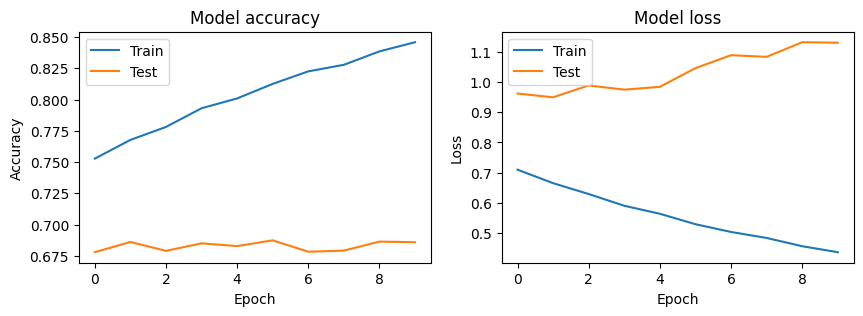

In [26]:
plot_history(no_augmented_history, 'Model Accuracy without Augmented Data')

In [ ]:
# Oke, sangat fitting diluar prediksi BMKG

# Model building WITH DROPOUT

  model_with_dropout = Sequential([
      layers.Input(shape=input_shape), # Input layer dengan ukuran (32,32,3)
      layers.Conv2D(filters=16, kernel_size=(3,3)), # akan membuat matriks 3 x 3, biasanya kelipatan 12/16, 10 pun boleh
      layers.MaxPooling2D(),
      layers.Conv2D(filters=32, kernel_size=(3,3)),
      layers.MaxPooling2D(),
      layers.Conv2D(filters=64, kernel_size=(3,3)),
      layers.MaxPooling2D(),

      layers.Flatten(), # Mengubaah high dimension matrix menjadi 1D matrix
      layers.Dense(128, activation='relu'),

      layer.Dropout(128)
      layers.Dense(10, activation='softmax')
  ])

  model_with_dropout.compile(
      optimizer='adam', # Umumnya optimizer untuk image classification itu 'adam' atau 'rmssprop'
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

model_with_dropout.summary()